In [149]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import scipy
import statsmodels
from statsmodels.stats.weightstats import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,s1,s2,y1
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1008.134596,1025.035793,999.260620,964.639790,1003.458776,1002.337918,991.419426,1007.265458,0.497585,0.492635,1000.569767
std,8.320269,13.284707,1.921541,14.535008,2.514194,2.332001,9.285440,3.795613,0.499995,0.499947,10.439449
min,992.325100,1000.095400,995.640500,935.809200,998.046500,997.274500,976.773000,997.779700,0.000000,0.000000,975.995900
25%,1001.973275,1012.776175,997.687875,951.858475,1001.579300,1000.541000,980.413575,1004.832975,0.000000,0.000000,994.712300
50%,1007.351750,1024.276650,999.243850,968.318800,1003.627300,1001.957700,992.325800,1007.234150,0.000000,0.000000,999.606550
75%,1012.614700,1036.769225,1000.311500,975.125825,1004.709700,1003.962500,1000.038000,1009.798825,1.000000,1.000000,1004.962125
max,1033.171200,1049.480900,1006.029700,1003.998000,1010.225800,1008.950700,1005.285200,1015.323100,1.000000,1.000000,1026.447300


In [66]:
target = data.y1
cols = data.columns[:-1]

In [4]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,s1,s2,y1
0,996.7459,1001.2642,999.1467,997.4923,999.7231,1000.8404,999.3012,998.4121,0.0,1.0,995.2712
1,996.6976,1001.2588,999.1436,997.5075,999.7024,1000.8533,999.3144,998.4018,0.0,1.0,995.2380
2,996.6631,1001.2644,999.1461,997.4998,999.7481,1000.8321,999.3057,998.4034,0.0,1.0,995.2146
3,996.6342,1001.2723,999.1480,997.5134,999.7333,1000.8421,999.2866,998.4075,0.0,1.0,995.1892
4,996.6195,1001.2735,999.1411,997.5150,999.7638,1000.8392,999.2458,998.4168,0.0,1.0,995.1890


## EDA

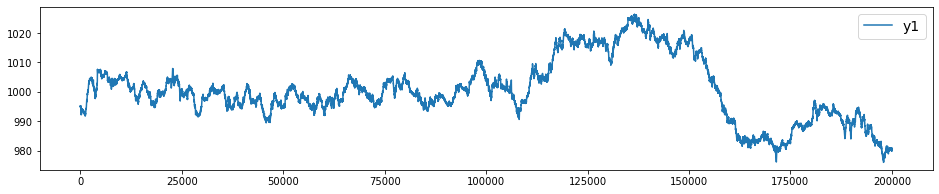

In [235]:
plt.figure(figsize = (16,3))
plt.plot(target, label = 'y1')
plt.legend(fontsize = 14);

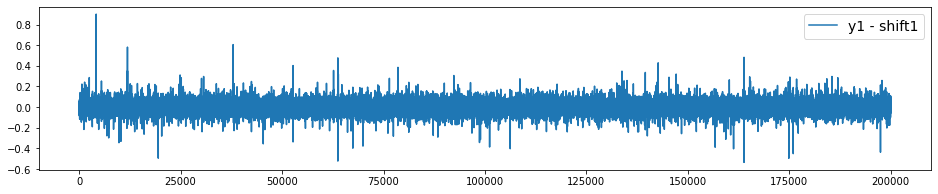

In [243]:
data['shift1'] = data.y1 - data.y1.shift(1)

plt.figure(figsize = (16,3))
plt.plot(data['shift1'], label = 'y1 - shift1')
plt.legend(fontsize = 14);

sm.tsa.stattools.adfuller(milk.milk)[1]

In [ ]:
data['shift1'] = data.y1 - data.y1.shift(1)

plt.figure(figsize = (16,3))
plt.plot(data['shift1'], label = 'y1 - shift1')
plt.legend(fontsize = 14);

В целевом сигнале y1 нет ярко выраженного тренда, но прослеживается какая-то цикличность

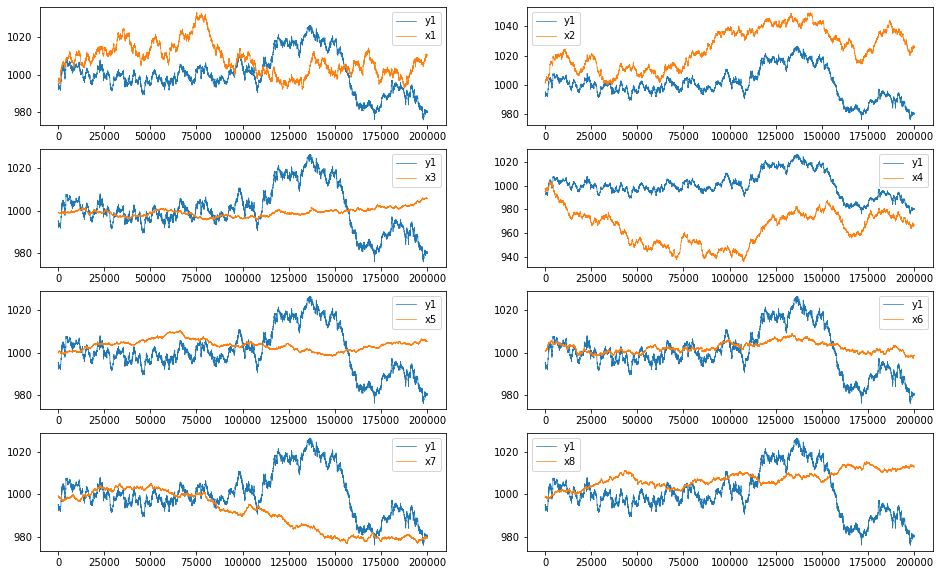

In [80]:
plt.figure(figsize = (16,10))

for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(target, lw = 0.7, label = 'y1')
    plt.plot(data[cols[i]], lw = 0.7, label = cols[i])
    plt.legend();

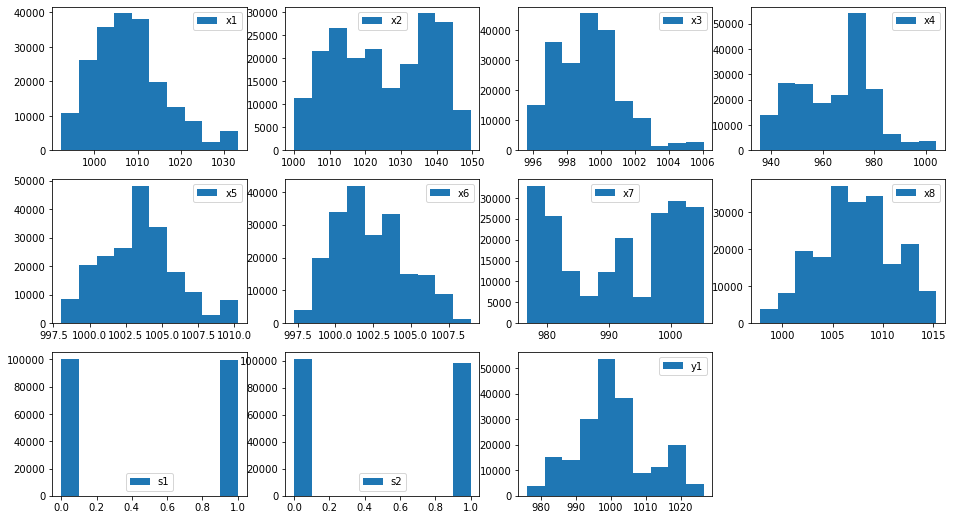

In [74]:
#_, axis = plt.subplots(3,3, figsize = (15,12))
plt.figure(figsize = (16,9))
for i in range(11):
    plt.subplot(3,4,i+1)
    plt.hist(data[data.columns[i]], label = data.columns[i])
    plt.legend()

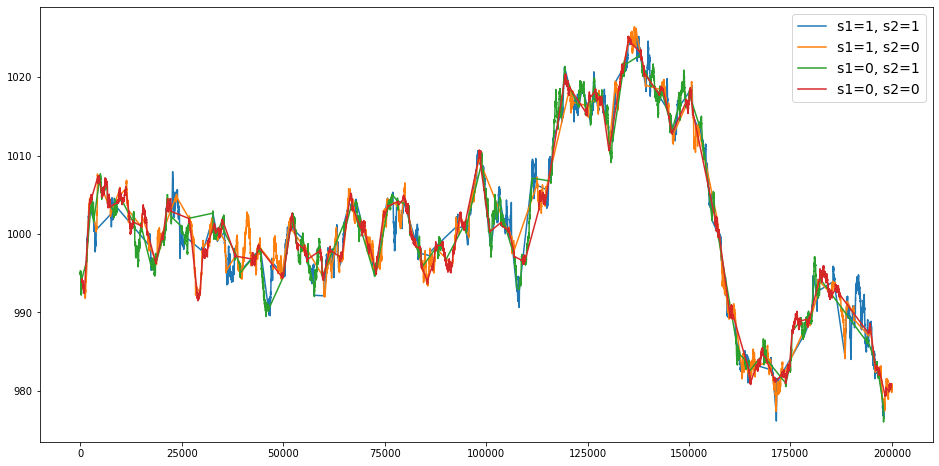

In [93]:
plt.figure(figsize = (16,8))
plt.plot(data[(data['s1'] == 1) & (data['s2'] == 1)]['y1'], label = 's1=1, s2=1')
plt.plot(data[(data['s1'] == 1) & (data['s2'] == 0)]['y1'], label = 's1=1, s2=0')
plt.plot(data[(data['s1'] == 0) & (data['s2'] == 1)]['y1'], label = 's1=0, s2=1')
plt.plot(data[(data['s1'] == 0) & (data['s2'] == 0)]['y1'], label = 's1=0, s2=0')

plt.legend(fontsize = 14);

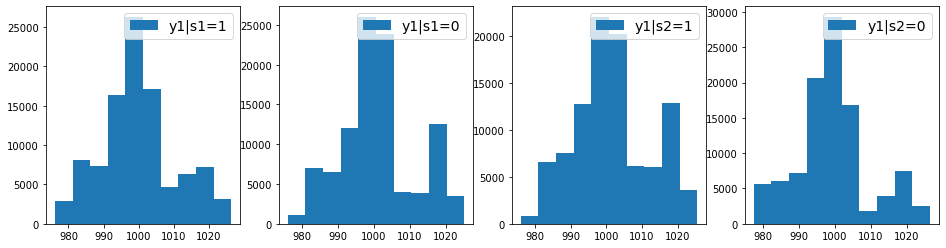

In [100]:
plt.figure(figsize = (16,4))

for i, (s, value) in enumerate( (('s1', 1),('s1', 0),('s2', 1),('s2', 0)) ):
    plt.subplot(1,4,i+1)
    plt.hist(data[(data[s] == value)]['y1'], lw = 0.7, label = 'y1|{}={}'.format(s, value))
    plt.legend(fontsize = 14);

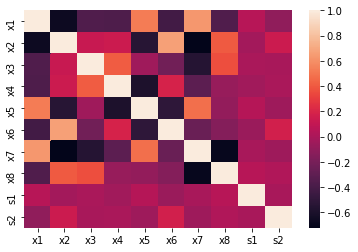

In [71]:
sns.heatmap(data[cols].corr())

In [73]:
data[cols].corrwith(target)

x1   -0.142997
x2    0.485245
x3   -0.350626
x4    0.215093
x5   -0.392478
x6    0.780524
x7    0.037063
x8   -0.382098
s1   -0.053531
s2    0.115611
dtype: float64

(array([ 3991., 15280., 13989., 29917., 53695., 38393.,  8763., 11390.,
        19911.,  4671.]),
 array([ 975.9959 ,  981.04104,  986.08618,  991.13132,  996.17646,
        1001.2216 , 1006.26674, 1011.31188, 1016.35702, 1021.40216,
        1026.4473 ]),
 <a list of 10 Patch objects>)

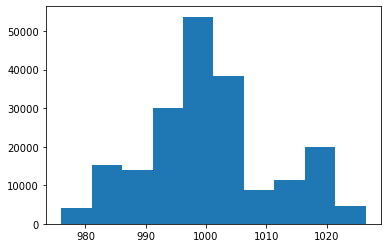

In [162]:
plt.hist(data.y1);

## Статистика

In [103]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,s1,s2,y1
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1008.134596,1025.035793,999.260620,964.639790,1003.458776,1002.337918,991.419426,1007.265458,0.497585,0.492635,1000.569767
std,8.320269,13.284707,1.921541,14.535008,2.514194,2.332001,9.285440,3.795613,0.499995,0.499947,10.439449
min,992.325100,1000.095400,995.640500,935.809200,998.046500,997.274500,976.773000,997.779700,0.000000,0.000000,975.995900
25%,1001.973275,1012.776175,997.687875,951.858475,1001.579300,1000.541000,980.413575,1004.832975,0.000000,0.000000,994.712300
50%,1007.351750,1024.276650,999.243850,968.318800,1003.627300,1001.957700,992.325800,1007.234150,0.000000,0.000000,999.606550
75%,1012.614700,1036.769225,1000.311500,975.125825,1004.709700,1003.962500,1000.038000,1009.798825,1.000000,1.000000,1004.962125
max,1033.171200,1049.480900,1006.029700,1003.998000,1010.225800,1008.950700,1005.285200,1015.323100,1.000000,1.000000,1026.447300


In [152]:
a = data.y1.sample(1000)
a.mean()

1001.0670014999993

In [146]:
stats.ttest_1samp(a, 1003)

Ttest_1sampResult(statistic=-2.2967079824992434, pvalue=0.02374223720567716)

In [154]:
zconfint(y), zconfint(a) # n>30 распр Стью и Норм - близки

((1000.5240146814928, 1000.6155188065076),
 (1000.4047514197526, 1001.7292515802475))

## Регрессионный анализ

In [6]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
lr = Ridge()
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
lr.fit(X,y)

Ridge()

In [19]:
pred = lr.predict(X)
mean_squared_error(lr.predict(X), y)

19.98397309356469

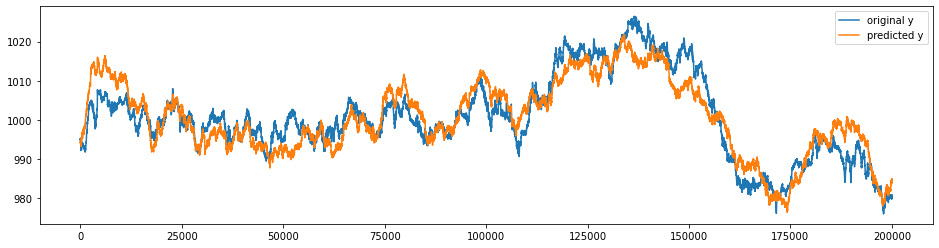

In [28]:
plt.figure(figsize = (16,4))
plt.plot(y, label = 'original y')
plt.plot(pred, label = 'predicted y')
plt.legend();

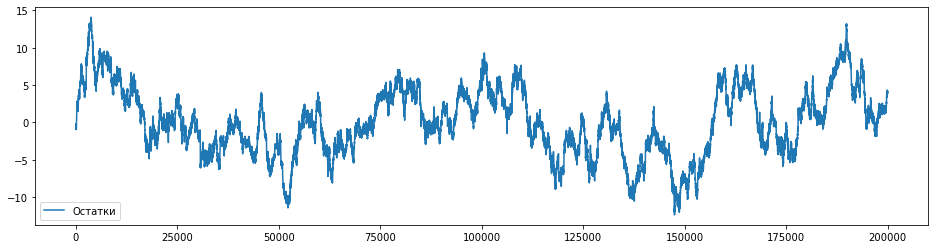

In [237]:
plt.figure(figsize = (16,4))
plt.plot(pred-y, label = 'Остатки')
plt.legend();

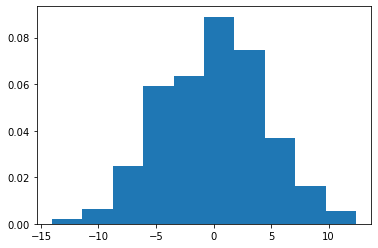

In [25]:
plt.figure(figsize = (6,4))
plt.hist(y - lr.predict(X), density = True);

((array([-4.49578239, -4.30333035, -4.19887063, ...,  4.19887063,
          4.30333035,  4.49578239]),
  array([-14.05842896, -14.04091528, -14.01941483, ...,  12.36454481,
          12.382858  ,  12.39023922])),
 (4.463955889982835, -1.8513411893873e-13, 0.9985479475529011))

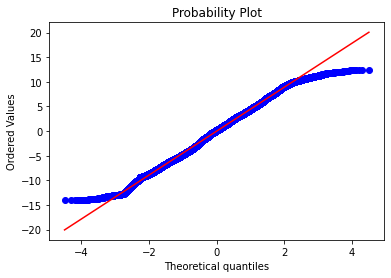

In [16]:
stats.probplot(y - lr.predict(X), dist="norm", plot=plt)

In [17]:
stats.shapiro(y - lr.predict(X))

/home/artyba/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9971009492874146, pvalue=1.8216880036222622e-44)

## Автокорреляции и корреляции между инструментами

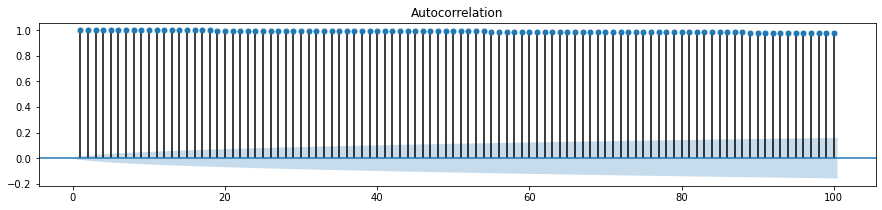

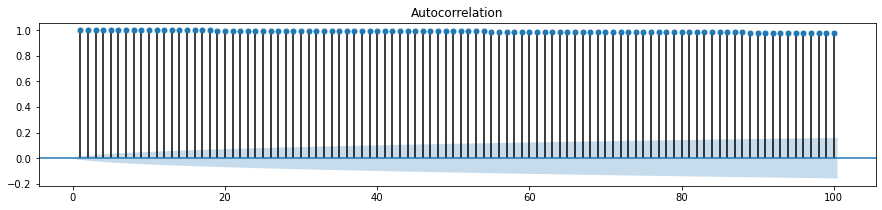

In [222]:
fig, ax = plt.subplots(1,1, figsize = (15,3))
#ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y[170000:], lags=np.arange(1,101), ax=ax)

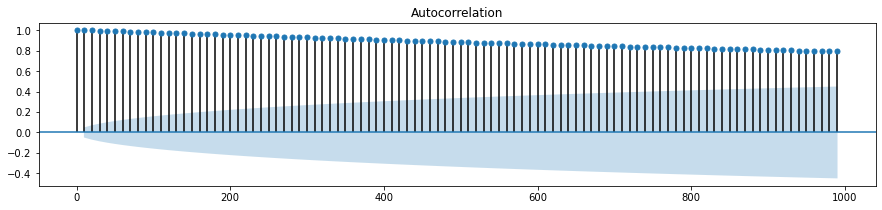

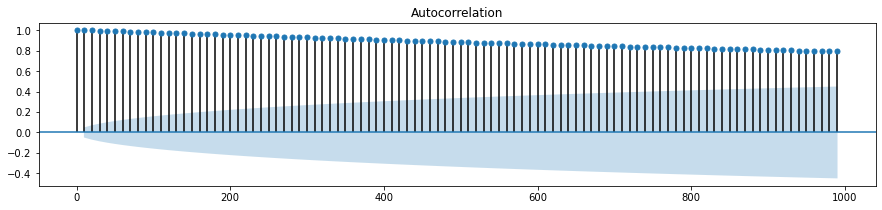

In [223]:
fig, ax = plt.subplots(1,1, figsize = (15,3))
#ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(y[170000:], lags=np.arange(0, 1000, 10), ax=ax)

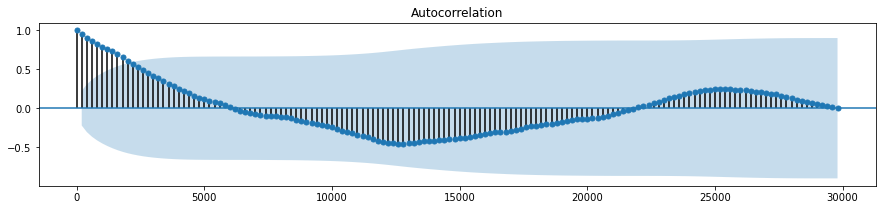

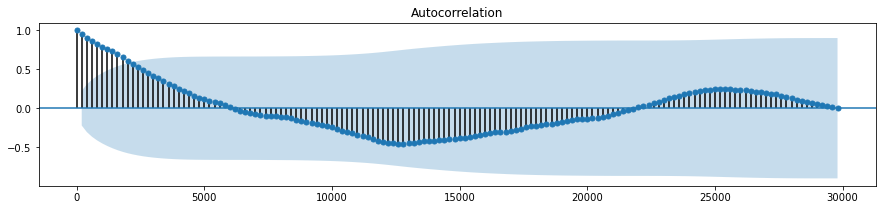

In [231]:
fig, ax = plt.subplots(1,1, figsize = (15,3))
sm.graphics.tsa.plot_acf(y[170000:], lags=np.arange(0,30000, 200), ax=ax)

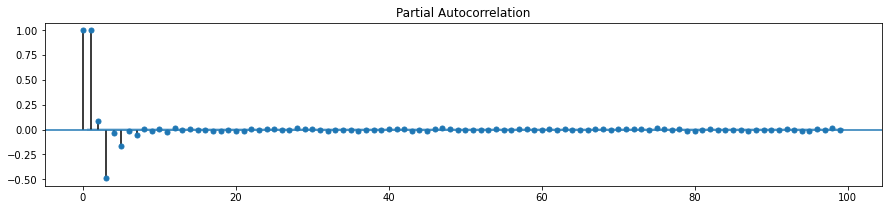

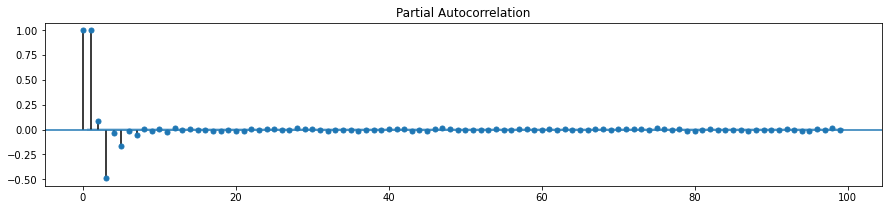

In [233]:
fig, ax = plt.subplots(1,1, figsize = (15,3))
sm.graphics.tsa.plot_pacf(y[170000:], lags=np.arange(0, 100), ax=ax)

In [240]:
data.index = pd.Index(sm.tsa.datetools.dates_from_range('0'))

plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(data.y1).plot()

UnboundLocalError: local variable 'yr2' referenced before assignment